In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import seaborn as sns

In [2]:
# to read data from excel file
data_path=r"C:\Users\DELL\Downloads\minipro\Modified_draft_1.xlsx"
raw_data = pd.read_excel(data_path, skiprows=1, header=3)
raw_data


,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,RH,Xylene,BP,AT,RF,WS,WD,Temp,SR,AQI
0,01-01-2017 00:00,02-01-2017 00:00,44.26,75.14,37.47,104.41,85.97,8.01,0.95,21.05,...,77.06,0.7,None,18.88,0.05,1.69,276.47,32.35,106.79,133.0
1,02-01-2017 00:00,03-01-2017 00:00,25.02,50.97,31.85,99.55,78.81,6.83,0.87,19.68,...,68.34,0.47,None,19.65,0.05,1.48,269.67,32.23,133.84,119.0
2,03-01-2017 00:00,04-01-2017 00:00,36.77,72.93,25.9,102.97,75.78,7.83,0.89,21.14,...,61.15,0.38,None,19.52,0.07,1.65,273.88,32.34,116.77,122.0
3,04-01-2017 00:00,05-01-2017 00:00,55.04,90.96,27.3,108.13,79.67,9.27,0.94,21.56,...,64.43,0.37,None,19.06,0.11,1.49,245.88,32.38,116.49,120.0
4,05-01-2017 00:00,06-01-2017 00:00,63.62,105.68,28.92,110.92,82.48,9.88,1.02,21.42,...,68.24,0.52,None,19.13,0.15,1.4,252.73,32.58,117.8,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,27-12-2022 00:00,28-12-2022 00:00,16.97,32.55,22.75,40.05,39.8,5.4,0.88,4.02,...,87.23,0.74,None,21.45,0,0.8,49.7,30.66,60.56,46.0
2187,28-12-2022 00:00,29-12-2022 00:00,32.33,55.19,32.93,53.23,55.1,4.76,0.85,7.64,...,74.74,0.85,None,22.36,0.02,0.48,106.24,30.48,95.57,60.0
2188,29-12-2022 00:00,30-12-2022 00:00,22.38,41.72,20.1,46.77,41.22,5.27,0.86,6.4,...,74.18,0.84,None,22.35,0,0.44,153.03,30.36,95.09,56.0
2189,30-12-2022 00:00,31-12-2022 00:00,35.59,58.4,32.27,54.42,55.18,5.38,0.9,5.13,...,73.03,0.88,None,22.06,0,0.61,151.21,30.08,95.89,67.0


In [3]:
#No.OF Null Values at target
raw_data.isna().sum()

From Date      0
To Date        0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
Benzene        0
Toluene        0
Ozone          0
RH             0
Xylene         0
BP             0
AT             0
RF             0
WS             0
WD             0
Temp           0
SR             0
AQI          240
dtype: int64

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  2191 non-null   object 
 1   To Date    2191 non-null   object 
 2   PM2.5      2191 non-null   object 
 3   PM10       2191 non-null   object 
 4   NO         2191 non-null   object 
 5   NO2        2191 non-null   object 
 6   NOx        2191 non-null   object 
 7   NH3        2191 non-null   object 
 8   CO         2191 non-null   object 
 9   SO2        2191 non-null   object 
 10  Benzene    2191 non-null   object 
 11  Toluene    2191 non-null   object 
 12  Ozone      2191 non-null   object 
 13  RH         2191 non-null   object 
 14  Xylene     2191 non-null   object 
 15  BP         2191 non-null   object 
 16  AT         2191 non-null   object 
 17  RF         2191 non-null   object 
 18  WS         2191 non-null   object 
 19  WD         2191 non-null   object 
 20  Temp    

In [5]:
#Dropping pressure since no.of available data instances are too low
temp_data_BP = raw_data['BP']
# axis = 1 : columnwise operation
data = raw_data.drop('BP',axis=1)
data.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Ozone,RH,Xylene,AT,RF,WS,WD,Temp,SR,AQI
0,01-01-2017 00:00,02-01-2017 00:00,44.26,75.14,37.47,104.41,85.97,8.01,0.95,21.05,...,16.96,77.06,0.7,18.88,0.05,1.69,276.47,32.35,106.79,133.0
1,02-01-2017 00:00,03-01-2017 00:00,25.02,50.97,31.85,99.55,78.81,6.83,0.87,19.68,...,16.87,68.34,0.47,19.65,0.05,1.48,269.67,32.23,133.84,119.0
2,03-01-2017 00:00,04-01-2017 00:00,36.77,72.93,25.9,102.97,75.78,7.83,0.89,21.14,...,15.85,61.15,0.38,19.52,0.07,1.65,273.88,32.34,116.77,122.0
3,04-01-2017 00:00,05-01-2017 00:00,55.04,90.96,27.3,108.13,79.67,9.27,0.94,21.56,...,16.91,64.43,0.37,19.06,0.11,1.49,245.88,32.38,116.49,120.0
4,05-01-2017 00:00,06-01-2017 00:00,63.62,105.68,28.92,110.92,82.48,9.88,1.02,21.42,...,17.49,68.24,0.52,19.13,0.15,1.4,252.73,32.58,117.8,127.0


In [6]:
raw_data

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,RH,Xylene,BP,AT,RF,WS,WD,Temp,SR,AQI
0,01-01-2017 00:00,02-01-2017 00:00,44.26,75.14,37.47,104.41,85.97,8.01,0.95,21.05,...,77.06,0.7,None,18.88,0.05,1.69,276.47,32.35,106.79,133.0
1,02-01-2017 00:00,03-01-2017 00:00,25.02,50.97,31.85,99.55,78.81,6.83,0.87,19.68,...,68.34,0.47,None,19.65,0.05,1.48,269.67,32.23,133.84,119.0
2,03-01-2017 00:00,04-01-2017 00:00,36.77,72.93,25.9,102.97,75.78,7.83,0.89,21.14,...,61.15,0.38,None,19.52,0.07,1.65,273.88,32.34,116.77,122.0
3,04-01-2017 00:00,05-01-2017 00:00,55.04,90.96,27.3,108.13,79.67,9.27,0.94,21.56,...,64.43,0.37,None,19.06,0.11,1.49,245.88,32.38,116.49,120.0
4,05-01-2017 00:00,06-01-2017 00:00,63.62,105.68,28.92,110.92,82.48,9.88,1.02,21.42,...,68.24,0.52,None,19.13,0.15,1.4,252.73,32.58,117.8,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,27-12-2022 00:00,28-12-2022 00:00,16.97,32.55,22.75,40.05,39.8,5.4,0.88,4.02,...,87.23,0.74,None,21.45,0,0.8,49.7,30.66,60.56,46.0
2187,28-12-2022 00:00,29-12-2022 00:00,32.33,55.19,32.93,53.23,55.1,4.76,0.85,7.64,...,74.74,0.85,None,22.36,0.02,0.48,106.24,30.48,95.57,60.0
2188,29-12-2022 00:00,30-12-2022 00:00,22.38,41.72,20.1,46.77,41.22,5.27,0.86,6.4,...,74.18,0.84,None,22.35,0,0.44,153.03,30.36,95.09,56.0
2189,30-12-2022 00:00,31-12-2022 00:00,35.59,58.4,32.27,54.42,55.18,5.38,0.9,5.13,...,73.03,0.88,None,22.06,0,0.61,151.21,30.08,95.89,67.0


In [7]:
listt=[]
month=['01','02','03','04','05','06','07','08','09','10','11','12']
year=['2017','2018','2019','2020','2021','2022']
dict={}
with open('avg_aqi.txt', 'r') as file:
    lines = file.readlines()
for line in lines:
    listt.append(round(float(line.strip()),2))
ptr=0
listt[7]=(listt[6]+listt[8])/2
for j in range(6):
    for i in range(12):
        dict[month[i]+year[j]]=listt[ptr]
        ptr+=1

for i in range(len(raw_data)):
    if pd.isna(raw_data.iloc[i,-1]):
#         print(raw_data.iloc[i,1][-13:-11],raw_data.iloc[i,1][-10:-6])
        raw_data.iloc[i,-1]=dict[raw_data.iloc[i,1][-13:-11]+raw_data.iloc[i,1][-10:-6]]
        
print(listt) 

[120.93, 133.0, 109.61, 96.88, 67.5, 44.52, 44.67, 72.61500000000001, 100.56, 89.79, 101.6, 110.77, 113.39, 103.63, 87.13, 74.38, 83.84, 55.8, 52.33, 45.04, 54.56, 76.6, 75.17, 96.55, 106.47, 73.71, 87.18, 66.37, 78.9, 53.0, 37.0, 32.84, 37.0, 39.77, 63.83, 57.61, 56.71, 63.39, 58.75, 52.83, 58.68, 42.87, 35.35, 37.06, 38.11, 67.0, 61.13, 92.87, 78.87, 78.0, 84.74, 85.58, 42.74, 52.04, 36.48, 39.9, 44.15, 59.93, 55.97, 103.06, 74.13, 74.96, 90.4, 67.03, 76.65, 49.81, 46.35, 43.8, 45.77, 57.87, 111.32, 88.65]


In [8]:
#No.OF Null Values at target
raw_data.isna().sum()

From Date    0
To Date      0
PM2.5        0
PM10         0
NO           0
NO2          0
NOx          0
NH3          0
CO           0
SO2          0
Benzene      0
Toluene      0
Ozone        0
RH           0
Xylene       0
BP           0
AT           0
RF           0
WS           0
WD           0
Temp         0
SR           0
AQI          0
dtype: int64

In [9]:
# data=raw_data

In [10]:
#Function to ensure the datatype of data is a valid for the cell
def numeric(row):
    if row is None:
        return None
    try:
        if np.isnan(row):
            return None
        else:
            row = str(row)
            return float(row.replace('x', '').replace('#', '').replace('*', ''))
    except (TypeError, ValueError):
        return None


In [11]:
parameter_list=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3','CO', 'SO2', 'Benzene', 'Toluene', 'Ozone', 'RH', 'Xylene', 'BP', 'AT','RF', 'WS', 'WD', 'Temp', 'SR','AQI']
for parameter in parameter_list:
    raw_data[parameter]=raw_data[parameter].apply(numeric)

In [12]:
#Dropping pressure since no.of available data instances are too low
temp_data_BP = raw_data['BP']
# axis = 1 : columnwise operation
raw_data= raw_data.drop('BP',axis=1)
raw_data.head()
data=raw_data

In [13]:
data = data.fillna(method='ffill')

In [14]:
# Iterate over each column in the DataFrame
for column in data.columns:
    # Iterate over each index and row data
    for index, row in data.iterrows():
        # Check if the cell value is "None"
        if row[column] == "None":
            # If it is, replace it with the previous value in the same column
            data.at[index, column] = data.at[index - 1, column]


In [15]:
data

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Ozone,RH,Xylene,AT,RF,WS,WD,Temp,SR,AQI
0,01-01-2017 00:00,02-01-2017 00:00,44.26,75.14,37.47,104.41,85.97,8.01,0.95,21.05,...,16.96,77.06,0.70,18.88,0.05,1.69,276.47,32.35,106.79,133.0
1,02-01-2017 00:00,03-01-2017 00:00,25.02,50.97,31.85,99.55,78.81,6.83,0.87,19.68,...,16.87,68.34,0.47,19.65,0.05,1.48,269.67,32.23,133.84,119.0
2,03-01-2017 00:00,04-01-2017 00:00,36.77,72.93,25.90,102.97,75.78,7.83,0.89,21.14,...,15.85,61.15,0.38,19.52,0.07,1.65,273.88,32.34,116.77,122.0
3,04-01-2017 00:00,05-01-2017 00:00,55.04,90.96,27.30,108.13,79.67,9.27,0.94,21.56,...,16.91,64.43,0.37,19.06,0.11,1.49,245.88,32.38,116.49,120.0
4,05-01-2017 00:00,06-01-2017 00:00,63.62,105.68,28.92,110.92,82.48,9.88,1.02,21.42,...,17.49,68.24,0.52,19.13,0.15,1.40,252.73,32.58,117.80,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,27-12-2022 00:00,28-12-2022 00:00,16.97,32.55,22.75,40.05,39.80,5.40,0.88,4.02,...,13.93,87.23,0.74,21.45,0.00,0.80,49.70,30.66,60.56,46.0
2187,28-12-2022 00:00,29-12-2022 00:00,32.33,55.19,32.93,53.23,55.10,4.76,0.85,7.64,...,22.41,74.74,0.85,22.36,0.02,0.48,106.24,30.48,95.57,60.0
2188,29-12-2022 00:00,30-12-2022 00:00,22.38,41.72,20.10,46.77,41.22,5.27,0.86,6.40,...,17.81,74.18,0.84,22.35,0.00,0.44,153.03,30.36,95.09,56.0
2189,30-12-2022 00:00,31-12-2022 00:00,35.59,58.40,32.27,54.42,55.18,5.38,0.90,5.13,...,19.19,73.03,0.88,22.06,0.00,0.61,151.21,30.08,95.89,67.0


In [16]:
correlation_matrix=data.loc[:,'PM2.5':].corr()

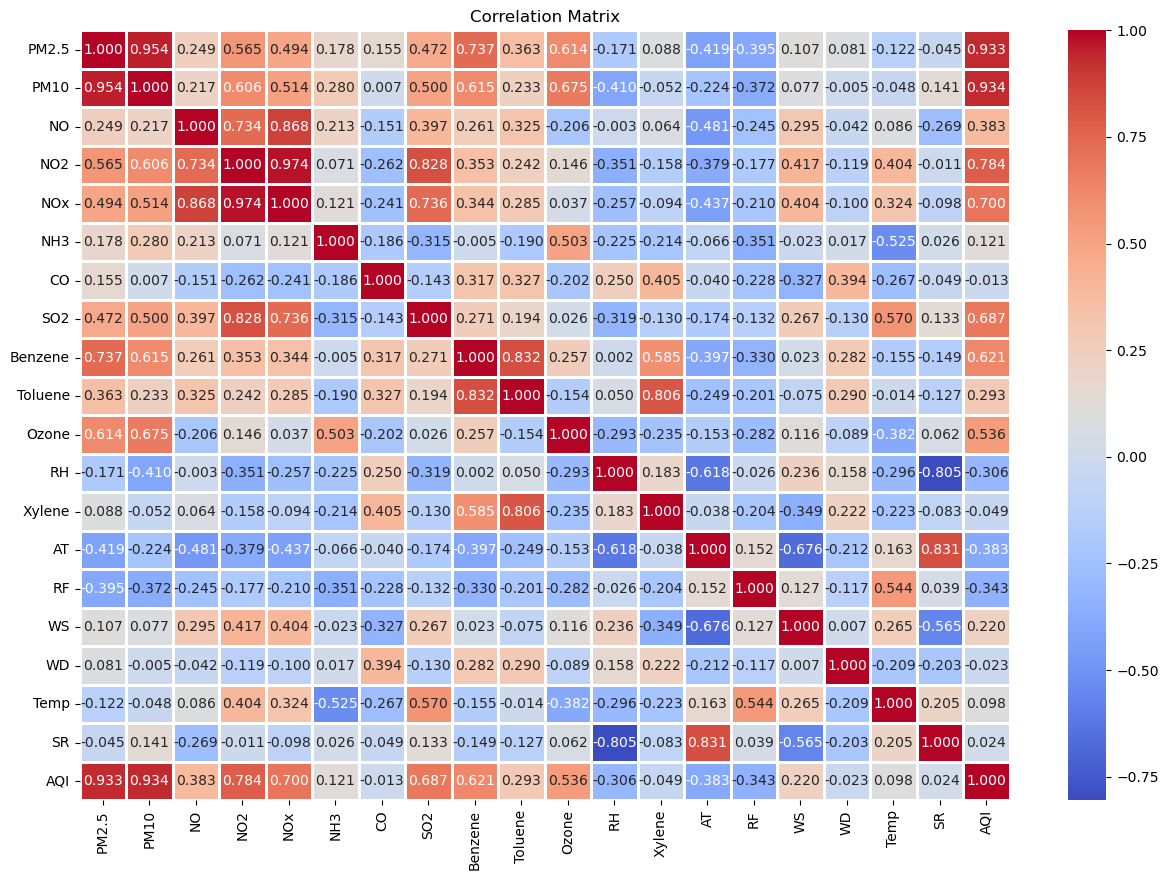

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm', fmt=".3f", linewidths=1)
plt.title('Correlation Matrix')
plt.show()

In [18]:
columns_to_transform=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'Benzene', 'Toluene', 'Ozone', 'RH', 'Xylene',  'AT',
       'RF', 'WS', 'WD', 'Temp', 'SR', 'AQI']
data_yearly=[]
for i in range(2017,2023):
    data_yearly.append(data[data['From Date'].str[-10:-6]== str(i)])
mean_values_monthly=[]
wanted_columns=columns_to_transform
month=['01','02','03','04','05','06','07','08','09','10','11','12']
for i in range(6):
        nlist=[]
        for j in range(12):
            mlist=[]
            for k in range(20):
                var=data_yearly[i][data_yearly[i]['From Date'].str[-13:-11]==month[j]][wanted_columns[k]].mean()
                if(var>=0):
                    mlist.append(var)
                else:
                    mlist.append(0)
            nlist.append(mlist)    
        mean_values_monthly.append(nlist)

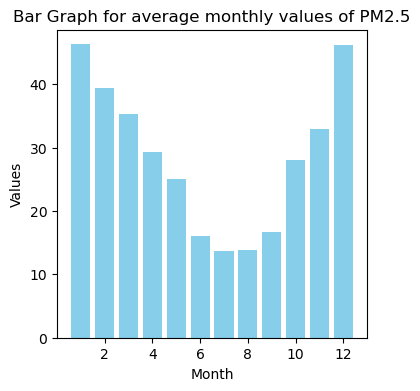

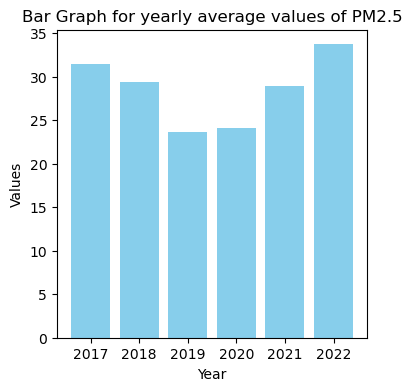

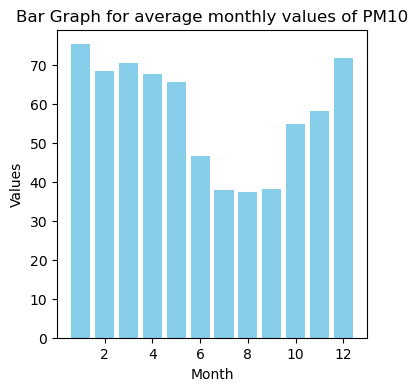

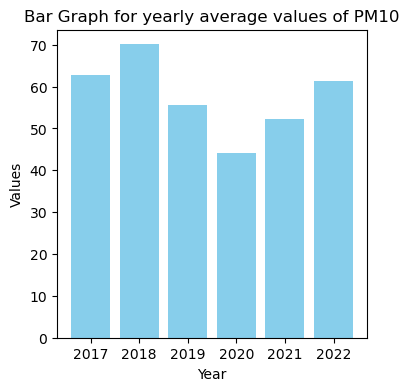

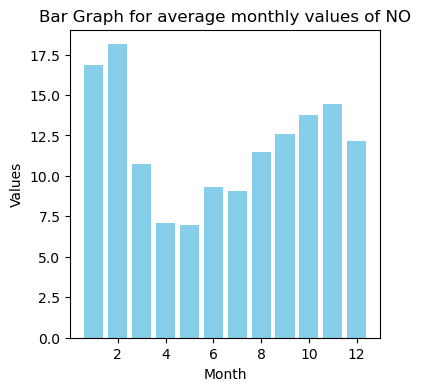

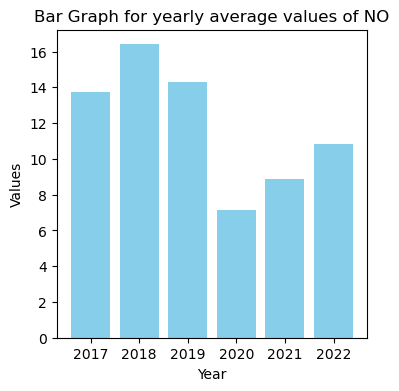

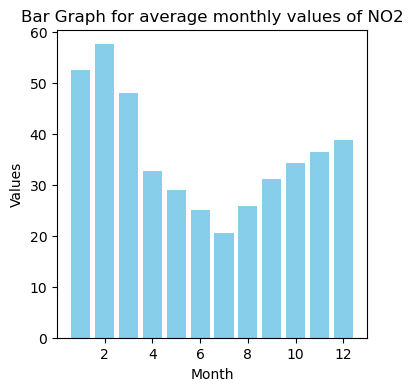

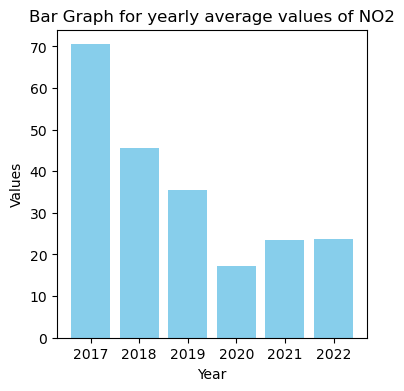

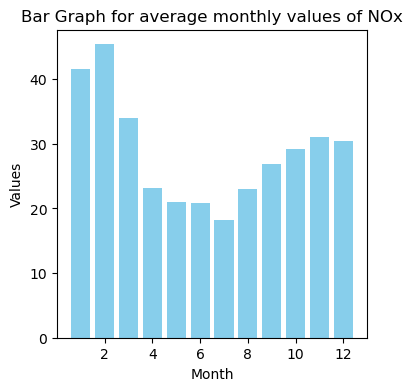

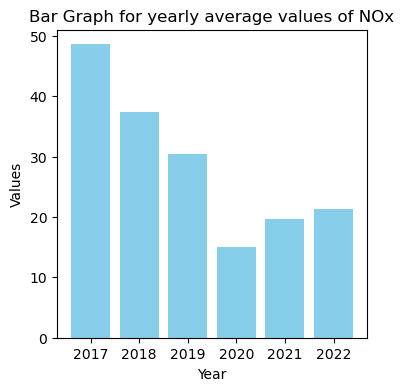

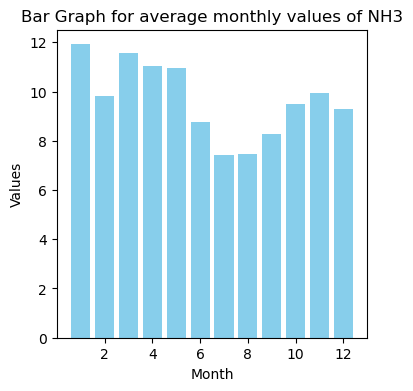

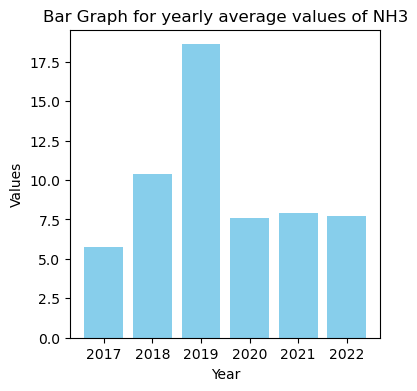

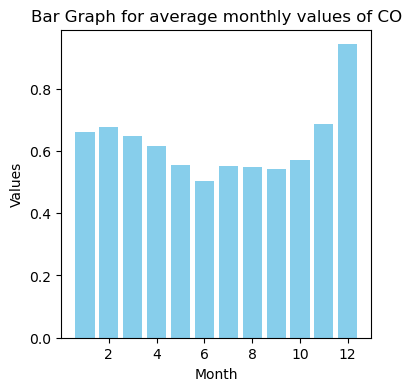

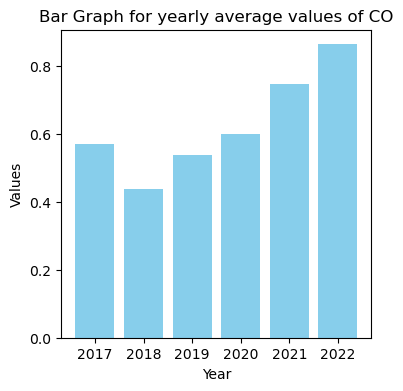

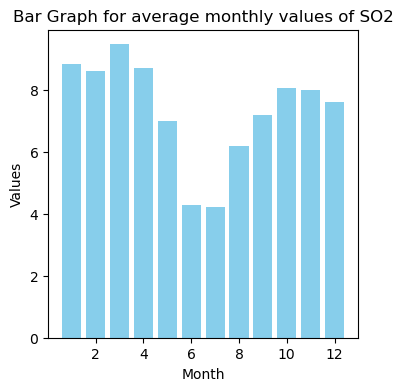

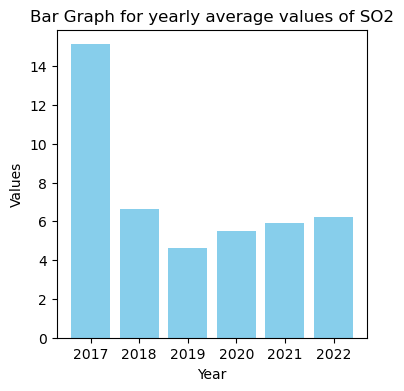

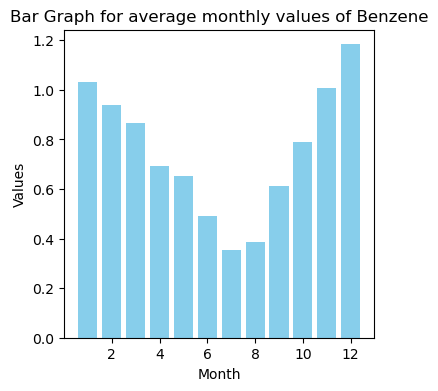

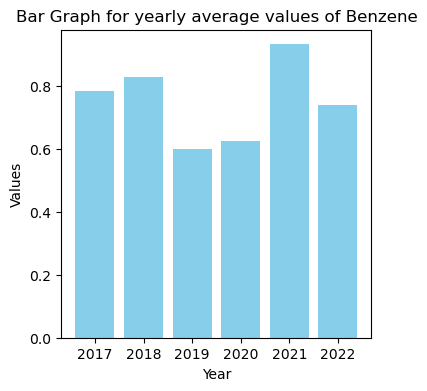

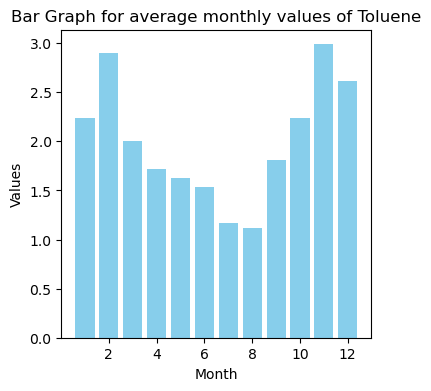

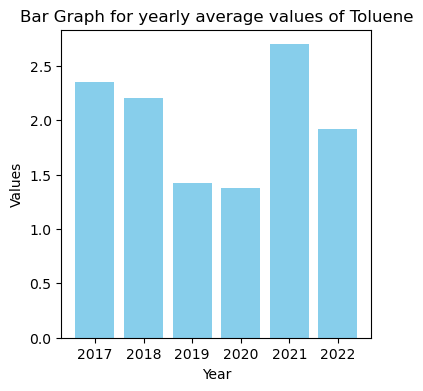

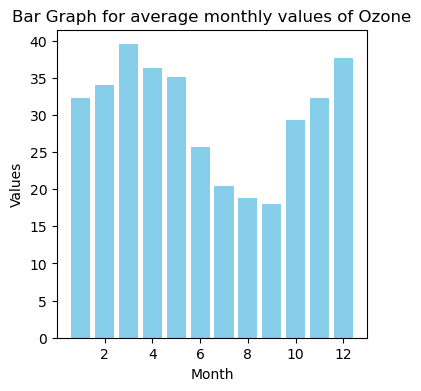

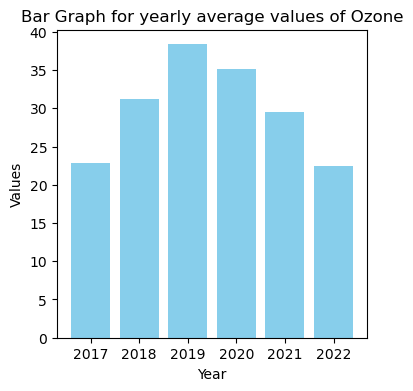

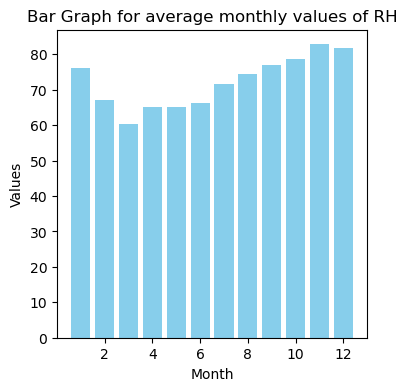

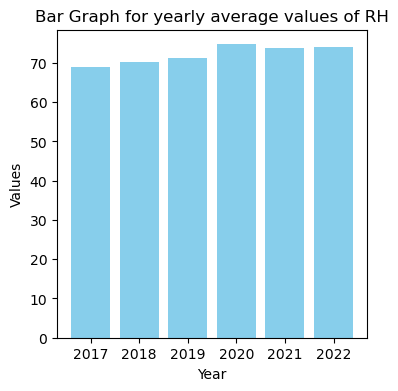

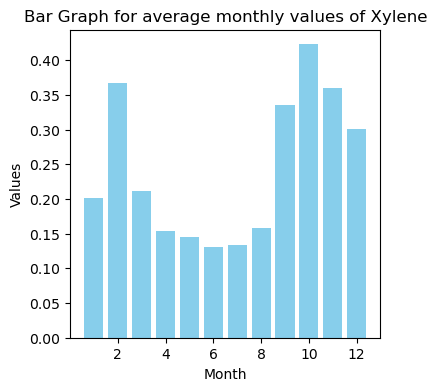

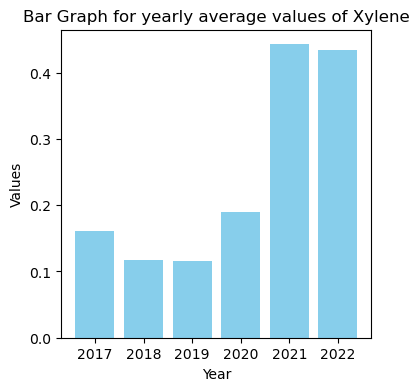

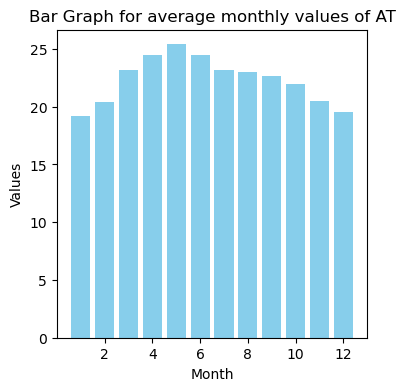

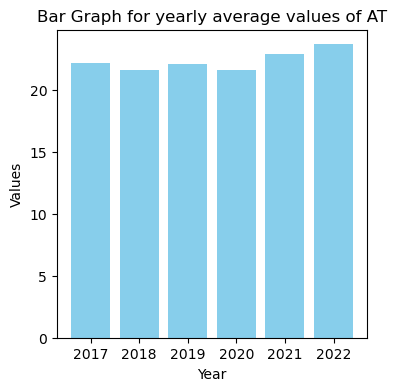

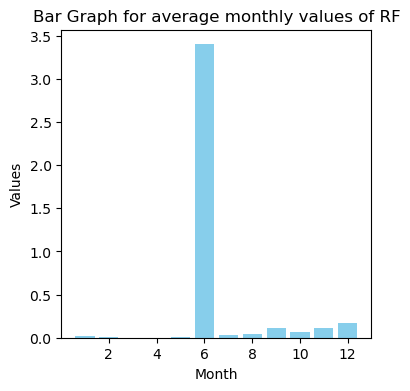

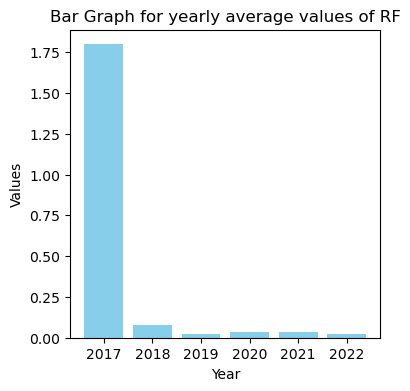

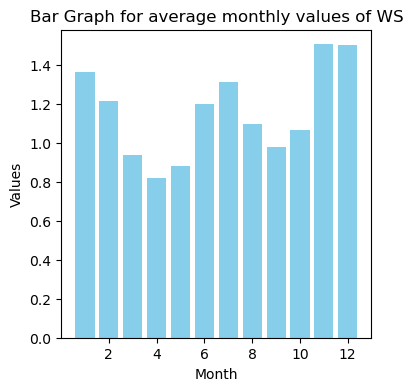

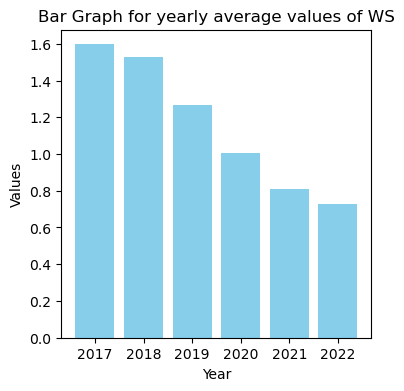

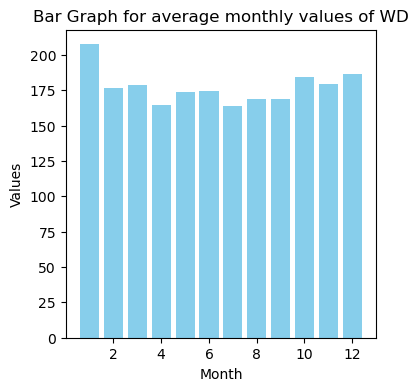

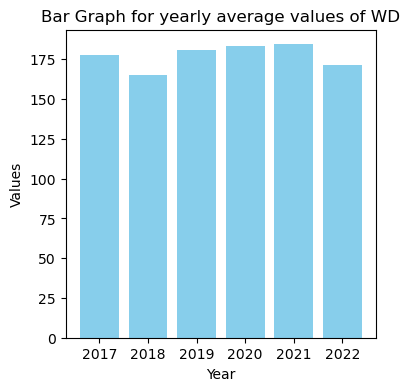

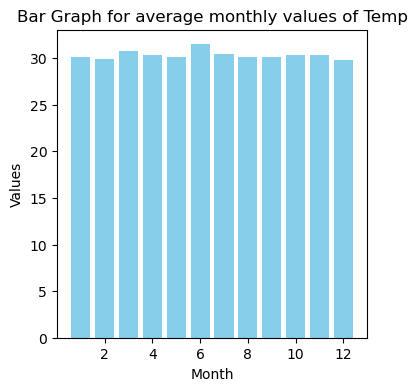

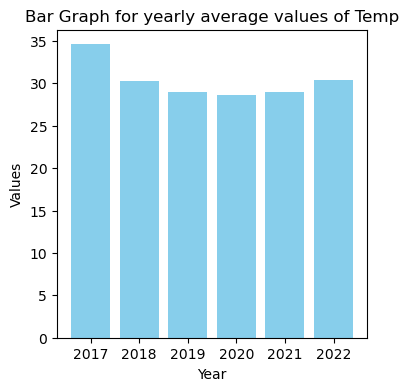

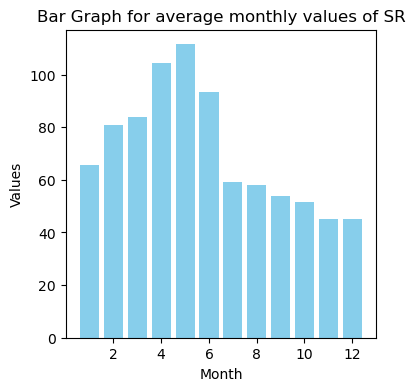

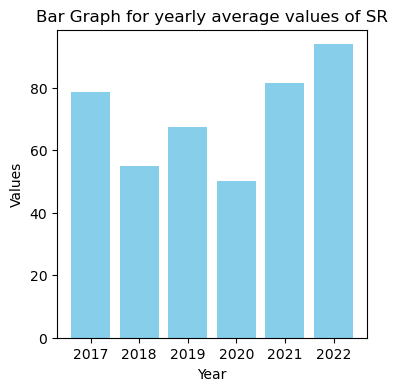

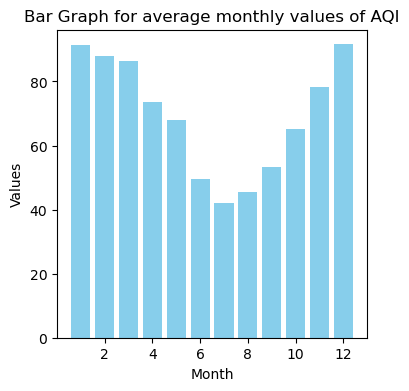

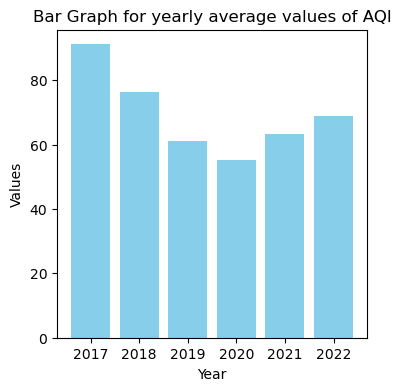

In [19]:
for i in range(20):
    avglist=[]
    for j in range(12):
        list=[]
        for l in range(6):
            list.append(mean_values_monthly[l][j][i])
        avglist.append(sum(list)/len(list))

    indexes = range(1,len(avglist)+1)
    plt.figure(figsize=(4,4))
    plt.bar(indexes, avglist, color='skyblue')
    plt.xlabel('Month')
    plt.ylabel('Values')
    plt.title('Bar Graph for average monthly values of '+wanted_columns[i])
    
    avglist=[]
    for j in range(6):
        list=[]
        for l in range(12):
            list.append(mean_values_monthly[j][l][i])
        avglist.append(sum(list)/len(list))
    plt1.figure(figsize=(4,4))
    indexes = range(2017,len(avglist)+2017)
    plt1.bar(indexes, avglist, color='skyblue')
    plt1.xlabel('Year')
    plt1.ylabel('Values')
    plt1.title('Bar Graph for yearly average values of '+wanted_columns[i])

    plt.show(),plt1.show()

In [20]:
from scipy.stats import skew, kurtosis
list=[]
for i in range(2,22):
    nlist=[]
    nlist.append(data.columns[i])
    raw_skewness = skew(data[data.columns[i]])
    raw_kurtosis = kurtosis(data[data.columns[i]])
    nlist.append(raw_skewness)
    nlist.append(raw_kurtosis)
    list.append(nlist)
print("{0:<10}".format('Metric'),"{0:<10}".format('Skew'),"{0:<10}".format('Kurtosis')+'\n')
for i  in range(len(list)):
    print("{0:<10}".format(list[i][0])+ "{0:>10}".format(str(round(list[i][1],2)))+"{0:>10}".format(str(round(list[i][2],2))))

Metric     Skew       Kurtosis  

PM2.5           1.11      1.07
PM10            0.79       1.4
NO              1.49      2.82
NO2             1.95       8.5
NOx             1.54      4.71
NH3              1.1      0.66
CO              5.52     54.09
SO2              1.9      3.97
Benzene          2.8     18.86
Toluene         3.33     18.72
Ozone           1.13      1.15
RH             -0.64     -0.07
Xylene          6.11     63.22
AT              0.07     -0.36
RF             10.63    114.92
WS              1.07      1.41
WD             -0.07     -0.53
Temp             3.7     21.43
SR              1.57      6.01
AQI             1.49      4.04


In [21]:
columns_to_transform=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'Benzene', 'Toluene', 'Ozone', 'RH', 'Xylene',  'AT',
       'RF', 'WS', 'WD', 'Temp', 'SR', 'AQI']
for i in range(len(columns_to_transform)):
    print(columns_to_transform[i],' ',(data[columns_to_transform[i]] <= 0).sum())


PM2.5   0
PM10   0
NO   0
NO2   0
NOx   1
NH3   0
CO   49
SO2   0
Benzene   36
Toluene   11
Ozone   0
RH   0
Xylene   177
AT   0
RF   1606
WS   0
WD   0
Temp   0
SR   12
AQI   0


In [22]:
data['CO']=data['CO'].replace(to_replace=0,value=0.001)
data['Benzene']=data['Benzene'].replace(to_replace=0,value=0.0001)
data['Toluene']=data['Toluene'].replace(to_replace=0,value=0.0001)
data['Xylene']=data['Xylene'].replace(to_replace=0,value=0.0001)
data['RF']=data['RF'].replace(to_replace=0,value=0.0000000001)

In [23]:
columns_to_skip = ['From Date','To Date']

columns_to_transform=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'Benzene', 'Toluene', 'Ozone', 'RH', 'Xylene',  'AT',
       'RF', 'WS', 'WD', 'Temp', 'SR', 'AQI']


transformed_data = np.log(data[columns_to_transform] + 1e-6)


In [24]:
transformed_data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Benzene,Toluene,Ozone,RH,Xylene,AT,RF,WS,WD,Temp,SR,AQI
0,3.790081,4.319353,3.623541,4.648325,4.453998,2.080691,-0.051292,3.046901,0.598837,1.603420,2.830858,4.344584,-0.356674,2.938103,-2.995712,0.524729,5.622102,3.476614,4.670864,4.890349
1,3.219676,3.931237,3.461037,4.600660,4.367040,1.921325,-0.139261,2.979603,0.277632,1.556037,2.825537,4.224495,-0.755020,2.978077,-2.995712,0.392043,5.597199,3.472898,4.896645,4.779124
2,3.604682,4.289500,3.254243,4.634438,4.327834,2.057963,-0.116533,3.051167,0.254643,1.398717,2.763170,4.113330,-0.967581,2.971440,-2.659246,0.500776,5.612690,3.476305,4.760206,4.804021
3,4.008060,4.510420,3.306887,4.683334,4.377893,2.226783,-0.061874,3.070840,0.336473,1.335001,2.827905,4.165579,-0.994250,2.947592,-2.207266,0.398777,5.504844,3.477541,4.757805,4.787492
4,4.152928,4.660416,3.364533,4.708809,4.412556,2.290513,0.019804,3.064325,0.518794,1.467875,2.861629,4.223031,-0.653925,2.951258,-1.897113,0.336473,5.532322,3.483699,4.768988,4.844187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2.831447,3.482777,3.124565,3.690129,3.683867,1.686399,-0.127832,1.391282,0.131029,1.851600,2.634045,4.468548,-0.301104,3.065725,-13.815411,-0.223142,3.906005,3.422959,4.103635,3.828641
2187,3.475996,4.010782,3.494384,3.974622,4.009150,1.560248,-0.162518,2.033398,0.506818,2.399712,3.109507,4.314015,-0.162518,3.107274,-3.911973,-0.733967,4.665701,3.417071,4.559859,4.094345
2188,3.108168,3.730981,3.000720,3.845242,3.718924,1.662031,-0.150822,1.856298,0.239018,1.648659,2.879760,4.306495,-0.174352,3.106826,-13.815411,-0.820978,5.030634,3.413126,4.554824,4.025352
2189,3.572065,4.067316,3.474138,3.996732,4.010601,1.682689,-0.105359,1.635106,0.530629,1.699279,2.954389,4.290870,-0.127832,3.093766,-13.815411,-0.494295,5.018670,3.403861,4.563202,4.204693


In [25]:
list=[]
for i in range(20):
    
        nlist=[]
        trans_skewness = skew(transformed_data[transformed_data.columns[i]])
        trans_kurtosis = kurtosis(transformed_data[transformed_data.columns[i]])
        nlist.append(transformed_data.columns[i])
        nlist.append(trans_skewness)
        nlist.append(trans_kurtosis)
        list.append(nlist)
print("{0:<10}".format('Metric'),"{0:<10}".format('Skew'),"{0:<10}".format('Kurtosis')+'\n')
for i  in range(len(list)):
    print("{0:<10}".format(list[i][0])+ "{0:>10}".format(str(round(list[i][1],2)))+"{0:>10}".format(str(round(list[i][2],2))))

Metric     Skew       Kurtosis  

PM2.5          -0.26      0.05
PM10           -0.36     -0.33
NO             -0.43      0.85
NO2            -0.23      -0.1
NOx            -5.17    103.25
NH3            -1.09      5.68
CO             -4.33     22.34
SO2             0.29       0.3
Benzene        -3.82     19.66
Toluene        -3.64      26.2
Ozone          -0.63       2.2
RH             -1.04      0.95
Xylene         -2.01      3.97
AT             -0.19     -0.42
RF              1.18     -0.38
WS              -0.3     -0.25
WD             -0.97      1.62
Temp            2.64     12.63
SR             -7.54     78.23
AQI             0.25     -0.58


In [26]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains features and 'y' contains labels/targets

X = transformed_data.drop(columns=['AQI'])
y = transformed_data['AQI']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Concatenate X_train and y_train horizontally
train_data = pd.concat([X_train, Y_train], axis=1)
test_data = pd.concat([X_test, Y_test], axis=1)

In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled=np.array(X_train_scaled)

In [30]:
common_dir=r"C:\Users\DELL\Downloads\minipro\Average"
np.save(fr"{common_dir}\X_train_scaled_avg.npy",X_train_scaled)
np.save(fr"{common_dir}\X_test_scaled_avg.npy",X_test_scaled)
np.save(fr"{common_dir}\x_train_avg.npy",X_train)
np.save(fr"{common_dir}\x_test_avg.npy",X_test)
np.save(fr"{common_dir}\y_test_avg.npy",Y_test)
np.save(fr"{common_dir}\y_train_avg.npy",Y_train)
np.save(fr"{common_dir}\transformed_data_avg.npy",transformed_data)